In [1]:
import mdtraj as md

In [2]:
from pathlib import Path

In [3]:
!pwd

/home/crystal/Desktop/D-allo-ile


In [4]:
traj = md.load_dcd('D_allo_prd.dcd', top='D_allo_clean.pdb')

In [5]:
traj

<mdtraj.Trajectory with 2000000 frames, 41 atoms, 2 residues, and unitcells at 0x7f80b8b07460>

In [6]:
traj = md.Trajectory.superpose(traj, traj[0], frame=0, atom_indices=None, ref_atom_indices=None, parallel=True)

In [7]:
md.rmsd(traj, traj[0], frame=0, atom_indices=None, parallel=True, precentered=False)

array([0.        , 0.06723214, 0.07650886, ..., 0.22462994, 0.2321717 ,
       0.23000479], dtype=float32)

In [8]:
md.rmsf(traj, traj[0], frame=0, atom_indices=None, parallel=True, precentered=False)

array([0.09174243, 0.14134829, 0.14132945, 0.14047027, 0.0772475 ,
       0.04957078, 0.07917698, 0.1608578 , 0.09728865, 0.15601127,
       0.17575076, 0.13445276, 0.18453214, 0.1833336 , 0.18548031,
       0.04227903, 0.11914311, 0.12004086, 0.18005376, 0.17875564,
       0.17857265, 0.05489771, 0.08631121, 0.1962304 , 0.0917435 ,
       0.14190847, 0.26306432, 0.1568303 , 0.2155148 , 0.21454497,
       0.21520887, 0.26585364, 0.05085081, 0.13114248, 0.10452794,
       0.18772294, 0.1733927 , 0.15454288, 0.20522422, 0.20491338,
       0.20438278], dtype=float32)

In [9]:
md.compute_phi(traj)

(array([[ 4, 21, 24, 23]]),
 array([[-1.078787 ],
        [-1.0230479],
        [-0.9603154],
        ...,
        [ 2.3286111],
        [ 1.8570871],
        [ 1.6317265]], dtype=float32))

In [10]:
md.compute_psi(traj)

(array([[ 0,  5,  4, 21]]),
 array([[1.3267665],
        [0.8580149],
        [1.051872 ],
        ...,
        [0.9080609],
        [1.1960878],
        [1.3190001]], dtype=float32))

In [11]:
psi_indices, phi_indices = [ 0,  5,  4, 21], [ 4, 21, 24, 23]
angles = md.compute_dihedrals(traj, [phi_indices, psi_indices])
print(angles)

[[-1.078787   1.3267665]
 [-1.0230479  0.8580149]
 [-0.9603154  1.051872 ]
 ...
 [ 2.3286111  0.9080609]
 [ 1.8570871  1.1960878]
 [ 1.6317265  1.3190001]]


In [12]:
angles.shape

(2000000, 2)

(-3.141592653589793, 3.141592653589793)

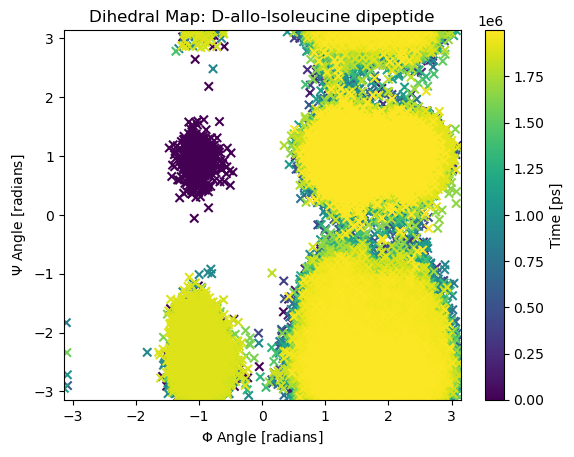

In [19]:
from pylab import *
from math import pi

figure()
title('Dihedral Map: D-allo-Isoleucine dipeptide')
scatter(angles[:, 0], angles[:, 1], marker='x', c=traj.time)
cbar = colorbar()
cbar.set_label('Time [ps]')
xlabel(r'$\Phi$ Angle [radians]')
xlim(-pi, pi)
ylabel(r'$\Psi$ Angle [radians]')
ylim(-pi, pi)

fig, ax = plt.subplots(figsize=(6,6),tight_layout=True)
_,_,_,hist = ax.hist2d(angles[:, 0]*180/math.pi, angles[:, 1]*180/math.pi, bins=60, range=[[-180,180],[-180,180]])
ax.set_xlim([-180, 180])
ax.set_ylim([-180, 180])
ax.set_xlabel(r'$\Phi$ Angle', fontsize =15)
ax.set_ylabel(r'$\Psi$ Angle', fontsize =15)
ax.set_title('Dihedral Map: D-allo-Isoleucine dipeptide', fontsize =18)
ax.xaxis.set_ticks([-180,-120,-60,0,60,120,180])
ax.yaxis.set_ticks([-180,-120,-60,0,60,120,180])
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('D-allo-Isoleucine dipeptide_dihedrals.png', dpi=600)

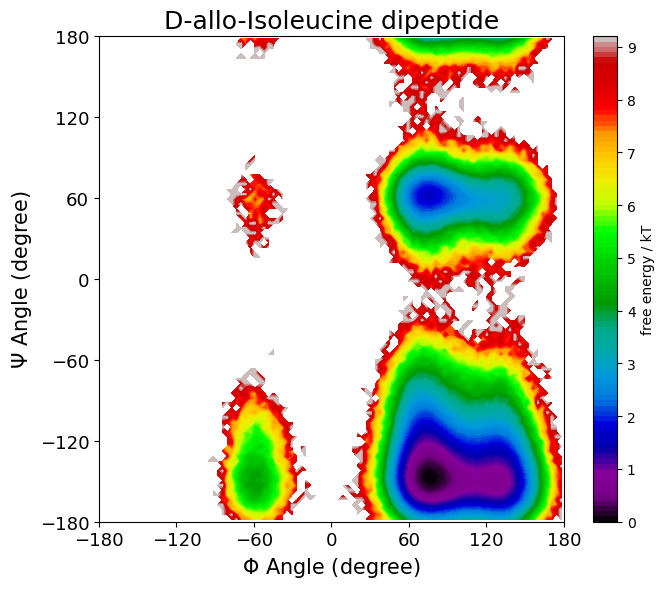

In [13]:
import pyemma as pm
from pylab import *
from math import pi
fig, ax = plt.subplots(figsize=(7,6),tight_layout=True)
fes = pm.plots.plot_free_energy(angles[:, 0]*180/math.pi, angles[:, 1]*180/math.pi, nbins=100, ax=ax)
ax.set_xlim([-180, 180])
ax.set_ylim([-180, 180])
ax.set_xlabel(r'$\Phi$ Angle (degree)', fontsize =15)
ax.set_ylabel(r'$\Psi$ Angle (degree)', fontsize =15)
ax.set_title('D-allo-Isoleucine dipeptide', fontsize =18)
ax.xaxis.set_ticks([-180,-120,-60,0,60,120,180])
ax.yaxis.set_ticks([-180,-120,-60,0,60,120,180])
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('D-allo-Isoleucine dipeptide_freeenergy.png', dpi=600)
plt.show()

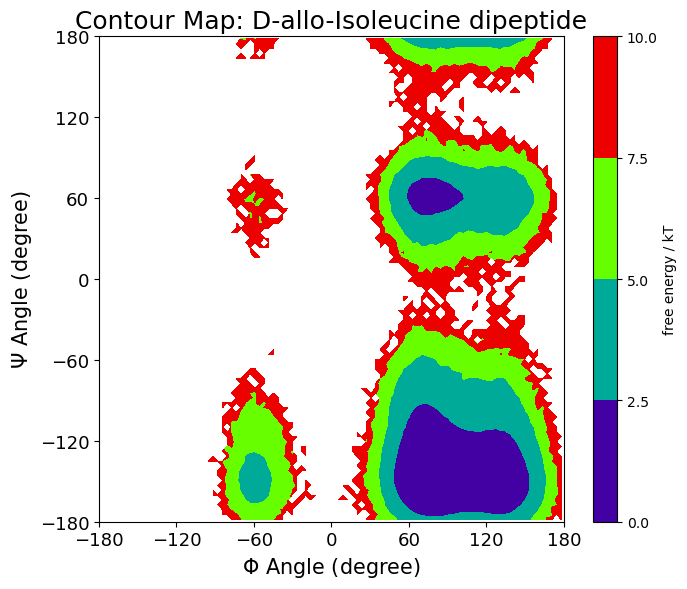

In [14]:
fig, ax = plt.subplots(figsize=(7,6),tight_layout=True)
fes = pm.plots.plot_free_energy(angles[:, 0]*180/math.pi, angles[:, 1]*180/math.pi, nbins=100, ncontours=3, ax=ax)
ax.set_xlim([-180, 180])
ax.set_ylim([-180, 180])
ax.set_xlabel(r'$\Phi$ Angle (degree)', fontsize =15)
ax.set_ylabel(r'$\Psi$ Angle (degree)', fontsize =15)
ax.set_title('Contour Map: D-allo-Isoleucine dipeptide', fontsize =18)
ax.xaxis.set_ticks([-180,-120,-60,0,60,120,180])
ax.yaxis.set_ticks([-180,-120,-60,0,60,120,180])
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('D-allo-Isoleucine dipeptide_contour.png', dpi=600)
plt.show()

In [15]:
int(angles.shape[0]/100)

20000

In [16]:
np.arange(0, int(angles.shape[0]/100)+1, 10)

array([    0,    10,    20, ..., 19980, 19990, 20000])

In [17]:
np.arange(0, int(angles.shape[0]/100)+1, 100).shape

(201,)

In [18]:
np.arange(0, int(angles.shape[0])+1, 10000).shape

(201,)

from pylab import *
from math import pi
psi = angles[:, 1].flatten()
phi = angles[:, 0].flatten()

fig, axes = plt.subplots(2,1, figsize=(20,8))

axes[0].plot(psi, lw=0.5)
axes[1].plot(phi, lw=0.5)
axes[0].set_title('D-allo-Isoleucine dipeptide', fontsize =18)
axes[0].set_ylabel(r'$\Psi$ Angle [radians]')
axes[1].set_ylabel(r'$\Phi$ Angle [radians]')
axes[1].set_xlabel('Time (ns)')
axes[0].set_xlabel('Time (ns)')

for ax in axes:
    ax.set_xticks(ticks=np.arange(0, int(angles.shape[0])+1, 10000), labels=np.arange(0, int(angles.shape[0]/100)+1, 100))
    ax.set_xlim([0, angles.shape[0]])

def find_transitions(s1_mask, s2_mask):
    s2s1_transition_ids, s1s2_transition_ids = [], []
    for i in tqdm(range(1, len(s1_mask)), desc=f'Finding transitions'):
        s1_ids = [k for k, x in enumerate(s1_mask[:i]) if x]
        s2_ids = [k for k, x in enumerate(s2_mask[:i]) if x]
        if len(s1_ids) == 0 or len(s2_ids) == 0:
            continue
        if s1_mask[i] and (s1_ids[-1] < s2_ids[-1]):
            s2s1_transition_ids.append([s2_ids[-1], i])
            with open('s2s1.txt', 'a') as f:
                # Write the list of strings to the file
                f.writelines(str(s2_ids[-1]) + ' ' + str(i) + '\n')
        if s2_mask[i] and (s1_ids[-1] > s2_ids[-1]):
            s1s2_transition_ids.append([s1_ids[-1], i])
            with open('s1s2.txt', 'a') as f:
                # Write the list of strings to the file
                f.writelines(str(s1_ids[-1]) + ' ' + str(i) + '\n')
    return s2s1_transition_ids, s1s2_transition_ids

def save_transitions(traj, s2s1_transition_ids, s1s2_transition_ids):
    if len(s2s1_transition_ids)>0:
        for no, ids in enumerate(s2s1_transition_ids):
            transition_traj = traj[ids[0]:ids[1]+1]
            transition_traj.superpose(transition_traj[0])
            transition_traj.save_pdb(md_transition_path.joinpath(f'traj_s2s1slowest{no}.pdb'))
    if len(s1s2_transition_ids)>0:
        for no, ids in enumerate(s1s2_transition_ids):
            transition_traj = traj[ids[0]:ids[1]+1]
            transition_traj.superpose(transition_traj[0])
            transition_traj.save_pdb(md_transition_path.joinpath(f'traj_s1s2slowest{no}.pdb'))
    return None

from tqdm import tqdm

from pathlib import Path

md_transition_path = Path('./')

find_transitions(phi>0.5, phi<-1.5)

s2s1_transition_ids = [[573210, 573211],
[839817, 839818],
[935155, 935168],
[1017335, 1017336],
[1145530, 1145531],
[1423077, 1423267],
[1560082, 1560083],
[1602714, 1602770],
[1859835, 1860720],
[1893146, 1893387]]
s1s2_transition_ids =  [[573209, 573210],
[839816, 839817],
[932789, 932972],
[1017334, 1017335],
[1145529, 1145530],
[1422625, 1423077],
[1560081, 1560082],
[1602034, 1602115],
[1856807, 1858373],
[1890821, 1891662]]
save_transitions(traj, s2s1_transition_ids, s1s2_transition_ids)